In [1]:
import Utils
import matplotlib.pyplot as plt
import numpy as np


In [3]:
image_num = 5
left = Utils.get_left_image(image_num)
right = Utils.get_right_image(image_num)
real_disp = Utils.get_disp_image(image_num)

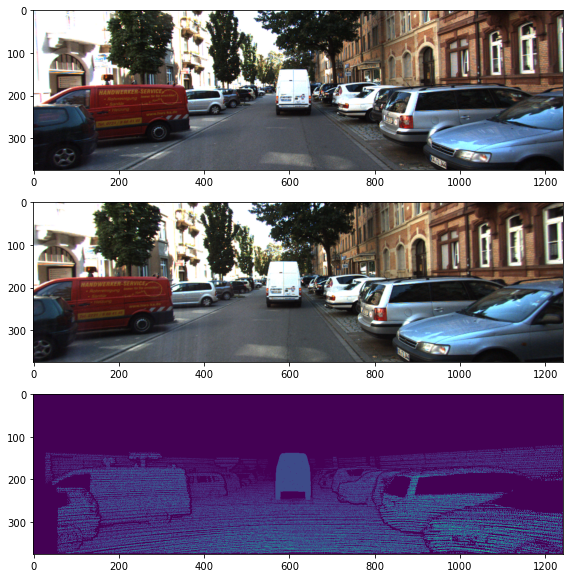

In [4]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.imshow(left)
plt.subplot(3,1,2)
plt.imshow(right)
plt.subplot(3,1,3)
plt.imshow(real_disp)

In [5]:
def get_patch_at(image, row, col, patch_size=9):
    half_patch_size = patch_size // 2
    patch = image[row-half_patch_size : row+half_patch_size+1,
            col-half_patch_size : col+half_patch_size+1]
    return patch

In [6]:
real_disp[200, 200]

42

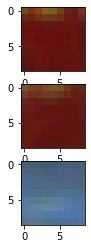

In [7]:
row = 200
col = 200
disp = real_disp[row, col]
patch_ref = get_patch_at(left, row, col)
patch_pos = get_patch_at(right, row, col-disp)
patch_neg = get_patch_at(right, row, col-disp-200)

plt.subplot(3, 1, 1)
plt.imshow(patch_ref)
plt.subplot(3, 1, 2)
plt.imshow(patch_pos)
plt.subplot(3, 1, 3)
plt.imshow(patch_neg)

In [8]:
np.sum((patch_ref - patch_pos)**2) #/(patch_ref.size * patch_pos.size)

0.18686661

In [9]:
def patch_mse_cost(patch_one, patch_two):
    '''
    :param patch_one: ndarray[3x3x3]=[HxWxC]
    :param patch_two: ndarray[3x3x3]=[HxWxC]
    :return: MSE = (1/MN)sum_by_row(sum_by_col(sum_by_channel(
        (patch_one[row, col, ch] - patch_two[row, col, ch])^2
        )))
    '''
    # koristiti SSE (sum of square errors)?
    # jer kad radimo sa MSE (mean square error) imamo male vrijednosti
    divisor = patch_one.size * patch_two.size
    squared_error = np.sum((patch_one - patch_two)**2)
    mse = squared_error / divisor
    return mse

In [10]:
def get_disp_map(ref_image, image, D):
    def cost_for_disp(ref_image, image, d):
        print(f"calculating disparity for {d}")
        shifted_image = np.roll(image, shift=d, axis=1)
        cost_for_disp = np.zeros((ref_image.shape[0], ref_image.shape[1]))
        for row in range(ref_image.shape[0]):
            for col in range(ref_image.shape[1]):
                ref_patch = get_patch_at(ref_image, row, col, 3)
                patch = get_patch_at(shifted_image, row, col, 3)
                cost_for_disp[row, col] = patch_mse_cost(ref_patch, patch)
        return cost_for_disp

    cost_for_all_disp = np.stack([cost_for_disp(ref_image, image, d) for d in range(D)])
    return np.argmin(cost_for_all_disp, axis=2)

In [11]:
pred_disp = get_disp_map(left, right, 3)

calculating disparity for 0


C:\Users\Antonio\AppData\Local\Temp/ipykernel_14896/1054192146.py:13: RuntimeWarning: invalid value encountered in true_divide
  mse = squared_error / divisor


calculating disparity for 1
calculating disparity for 2


In [15]:
pred_disp.shape

(3, 375)